In [21]:
import os
import sys

import numpy as np
import pandas as pd

from tqdm import tqdm
from IPython.display import clear_output

import matplotlib as mpl 
import matplotlib.pyplot as plt

sys.path.insert(0, '../../icenumerics/')
sys.path.insert(0, './auxnumerics/')
import icenumerics as ice


from parameters import params
import auxiliary as aux
import montecarlo as mc
import chirality_tools as chir
from numba import jit

ureg = ice.ureg

%reload_ext autoreload
%autoreload 2

idx = pd.IndexSlice

# Initialization

In [29]:
N = 10
a = params["lattice_constant"]
afstate_path = '/media/eru/ina/stuckgs/data/states/af2'
trj = pd.read_csv(os.path.join(afstate_path,f'{N}.csv'))


# Simulated annealing

In [30]:
centers, dirs, rels = mc.trj2numpy(trj)
vrt_lattice = mc.vertices_lattice(a.magnitude,N,spos=(0,0))
indices_matrix = mc.indices_lattice(vrt_lattice,centers, a.magnitude, N)

In [34]:
def simulated_annealing(file_path, mcsteps, centers, dirs, rels, realization):

    # compute the old 'energy'
    Eold = mc.get_objective_function(indices_matrix,dirs,N)

    T = 3000

    for i in tqdm(range(mcsteps)):

        # generate new configuration
        dirs_new, rels_new = mc.flip_loop(params['lattice_constant'].magnitude, N, centers,dirs,rels)
        #dirs_new,rels_new = mc.flip_spin(dirs_new,rels_new,np.random.randint(0,len(dirs)))

        # compute the new energy
        Enew = mc.get_objective_function(indices_matrix,dirs_new,N)

        # compute dE
        dE = Enew - Eold

        
        # Accept or reject the change
        if mc.is_accepted(dE,T):
            dirs = dirs_new.copy()
            rels = rels_new.copy()

            Eold = Enew
        else:
            
            Eold = Eold


        T = 0.95*T
    
    # save the stuff
    print('saving...')
    df = mc.numpy2trj(centers,dirs,rels)
    df['realization'] = [realization]*len(df)

    if realization == 1:
        df.to_csv(file_path)
    else:
        df.to_csv(file_path,mode='a',header=False)



In [36]:
file_path = f'/media/eru/ina/stuckgs/data/q2_degeneracy/s{N}.csv'
simulated_annealing(file_path,int(1e5), centers, dirs, rels,1)


100%|██████████| 100000/100000 [00:20<00:00, 4788.17it/s]

saving...


# Less yappin' more flippin'

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/195 [00:00<?, ?it/s]

  0%|          | 0/392 [00:00<?, ?it/s]

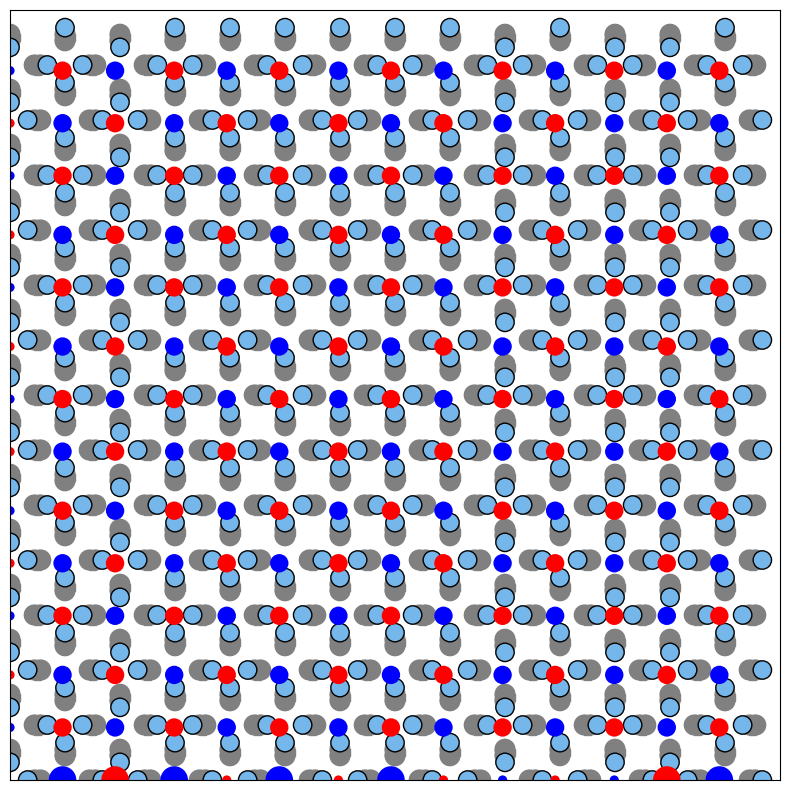

In [28]:
fig, ax= plt.subplots(figsize=(10,10))

trj = mc.numpy2trj(centers,dirs,rels)

region_limit = N*params['lattice_constant'].magnitude
ice.draw_frame(trj, frame_no=0,
               region=[0,region_limit,0,region_limit],
               radius=params["particle_radius"].magnitude,
               cutoff=params["trap_sep"].magnitude/2,
               particle_color='#75b7ea',
               trap_color='gray',
               ax = ax)

v = ice.vertices()
v = v.trj_to_vertices(trj)

v.display(ax,dpl_scale=0.5,dpl_width=2.5,circle_scale=0.7)
plt.show()

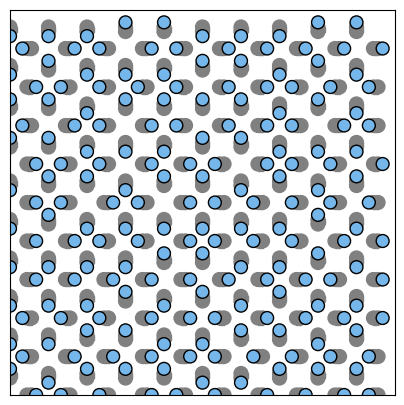

In [49]:
fig, ax= plt.subplots(figsize=(5,5))

region_limit = N*params['lattice_constant'].magnitude
ice.draw_frame(mc.numpy2trj(centers,dirs1,rels1), frame_no=0,
               region=[0,region_limit,0,region_limit],
               radius=params["particle_radius"].magnitude,
               cutoff=params["trap_sep"].magnitude/2,
               particle_color='#75b7ea',
               trap_color='gray',
               ax = ax)

plt.show()

# Other stuff

In [29]:
trj = col.to_ctrj()
trj['frame'] = [0]*len(trj)
trj = trj.reset_index().set_index(['frame', 'id'])

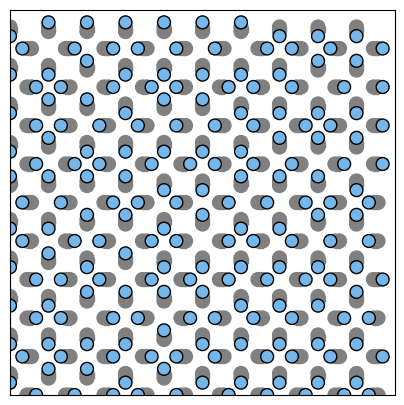

In [33]:
fig, ax= plt.subplots(figsize=(5,5))

region_limit = N*params['lattice_constant'].magnitude
ice.draw_frame(trj, frame_no=0,
               region=[0,region_limit,0,region_limit],
               radius=params["particle_radius"].magnitude,
               cutoff=params["trap_sep"].magnitude/2,
               particle_color='#75b7ea',
               trap_color='gray',
               ax = ax)

plt.show()